In [121]:
import pandas as pd
import datetime as dt
import pickle
import matplotlib.pyplot as plt

import src.utils.returns_preprocessing as preproc
import src.pca.eigen_portfolios_functions as eg_functions

import os

import logging
logging.getLogger('tensorflow').disabled = True

# 1. Main experiements results

In [123]:
result_index_files = []
base_path = './results/results_to_work/'
for filename in os.listdir(base_path):
    if 'index' in filename:
        result_index_files.append(base_path+filename)

In [124]:
result_index_files

['./results/results_to_work/index_results_15.pickle',
 './results/results_to_work/index_results_25.pickle',
 './results/results_to_work/index_results_20.pickle',
 './results/results_to_work/index_results_10.pickle',
 './results/results_to_work/index_results_5.pickle']

In [3]:
with open('./results/results_to_work/index_results_10.pickle', 'rb') as infile:
    index_results_10 =  pickle.load(infile)

2023-04-16 21:46:20.100740: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 21:46:23.892663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# indexes
months = {'jan':'01', 'abr':'04','jul':'07', 'out':'10'}
years = ['2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

keys_index = []
for year in years:
    for month in months.values():
        keys_index.append(year+'-'+month)




### 1. Plot PSR for test sets

In [75]:
# 1. INDEX bottom 10

# first factor
psr_diff = []
for k,v in index_results_10.items():
    psr_diff.append(v['test_results']['TEST_PSR'] - v['test_results']['TREST_PSR_REFERENCE'])

# temporal view
temporal_psr = []
for key in keys_index:
    if key in index_results_10:
        temporal_psr.append((key,index_results_10[key]['test_results']['TREST_PSR_REFERENCE'], index_results_10[key]['test_results']['TEST_PSR']))
    else:
        temporal_psr.append((key, 0, 0))
temporal_psr = pd.DataFrame(temporal_psr, columns=['date', 'PSR_REFERENCE', 'PSR_PREDICTED'])
temporal_psr['diff'] = temporal_psr['PSR_PREDICTED'] - temporal_psr['PSR_REFERENCE']
temporal_psr.index = temporal_psr['date']


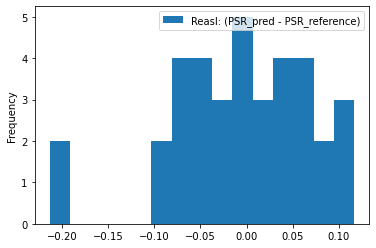

<AxesSubplot:xlabel='date'>

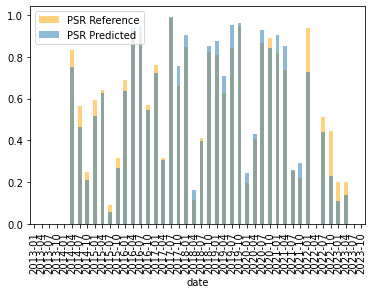

In [118]:
# Graphs
# plt.new figure
plot_hist(pd.Series(psr_diff), label='Reasl: (PSR_pred - PSR_reference)', legend = True, bins = 15)
# comparing PSR
# plt.new figure
#plot_multiple_bar([
#    {'s':temporal_psr['PSR_REFERENCE'], 'kwargs':{'legend': True, 'label': "PSR Reference", 'alpha': 0.5, 'color': 'orange'}},
#    {'s':temporal_psr['PSR_PREDICTED'], 'kwargs':{'legend': True, 'label': "PSR Predicted", 'alpha': 0.5}}
#])
temporal_psr['PSR_REFERENCE'].plot.bar(legend = True, label = "PSR Reference", alpha = 0.5, color = 'orange')
temporal_psr['PSR_PREDICTED'].plot.bar(legend = True, label = "PSR Predicted", alpha = 0.5)

# times where predicted was higher than reference
# plot new figure



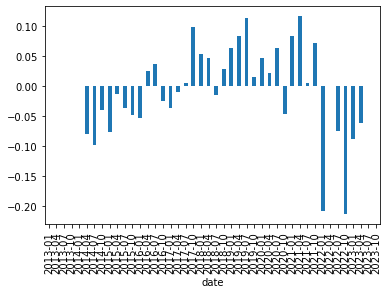

In [119]:
plot_bar(temporal_psr['diff'])

In [115]:
# other methods

def plot(s, **kwargs):
    s.plot(**kwargs)
    plt.show()
    
def plot_hist(s, **kwargs):
    s.plot.hist(**kwargs)
    plt.show()
    
def plot_bar(s, **kwargs):
    s.plot.bar(**kwargs)
    plt.show()

def plot_multiple_bar(bars):
    for bar in bars: 
        bar['s'].plot.bar(**bars['kwargs']) ##kwargs are a problem
    plt.show()

###
def plot_cummulative_returns(factor_iteration):
    ((pd.Series(preproc.log_to_simple_returns(factor_iteration['train_results']['portfolio_log_returns_pred'])) + 1).cumprod() - 1).plot(label='predicted', legend = True)
    ((pd.Series(preproc.log_to_simple_returns(factor_iteration['train_results']['y_log_ammended'])) + 1).cumprod() - 1).plot(label='Target', legend = True)
    ((pd.Series(preproc.log_to_simple_returns(factor_iteration['train_results']['y_log_train'])) + 1).cumprod() -1).plot(label='Original', legend = True)
    plt.show()
    
# other methods
def plot_cummulative_test_returns(factor_iteration):
    ((pd.Series((factor_iteration['test_results']['y_predicted'].values)) + 1).cumprod() - 1).plot(label='predicted', legend = True)
    ((pd.Series((factor_iteration['test_results']['y_target'].values)) + 1).cumprod() -1).plot(label='Original', legend = True)
    plt.show()